In [27]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
import kagglehub

path = kagglehub.dataset_download("nelgiriyewithana/apple-quality")

print("Path to dataset files:", path)
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    print("No CSV file found in the directory.")
else:
    print(f"Found CSV file: {csv_file}")


Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\nelgiriyewithana\apple-quality\versions\1
Found CSV file: C:\Users\keert\.cache\kagglehub\datasets\nelgiriyewithana\apple-quality\versions\1\apple_quality.csv


#Loading Dataset

In [29]:
df = pd.read_csv(csv_file, delimiter=',')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [30]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(df.info())

Number of rows: 4001
Number of columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None


In [31]:
df['Acidity'].unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-2.229719806',
       '1.599796456', 'Created_by_Nidula_Elgiriyewithana'], dtype=object)

In [32]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


<h1>Deleting the Last Row </h1>

In [33]:
df.drop(df.index[-1], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [35]:
df['Acidity'] = pd.to_numeric(df['Acidity'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [37]:
#already Standardization was performed previously. So not need to clean the data

In [38]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [39]:
df.drop('A_id', axis=1, inplace=True)

In [40]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [41]:
df['Quality']=df['Quality'].apply(lambda x:1 if x == 'good' else 0)

<Axes: >

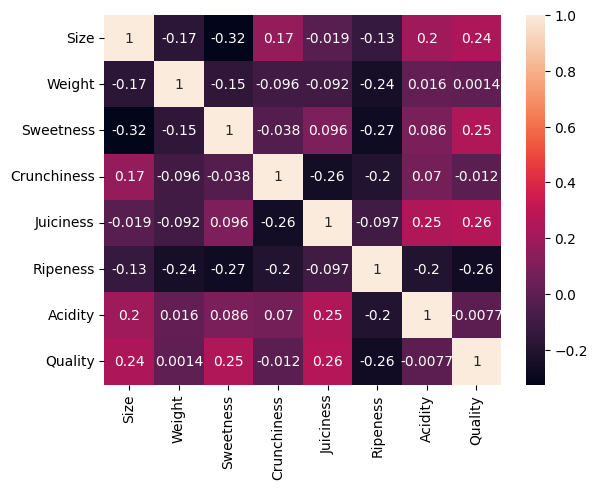

In [42]:
sns.heatmap(df.corr(),annot=True)

In [43]:
sweetness_by_quality = df.groupby('Quality')['Sweetness'].mean()
print(sweetness_by_quality)

Quality
0   -0.959195
1    0.016287
Name: Sweetness, dtype: float64


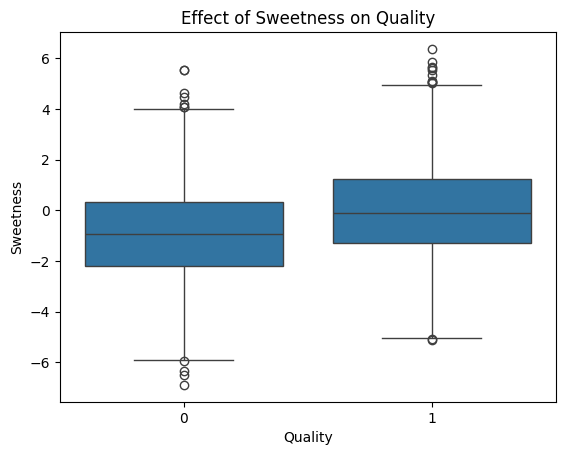

In [44]:
# Create a boxplot to show how 'Sweetness' varies by 'Quality'
sns.boxplot(x='Quality', y='Sweetness', data=df)

# Customize the plot
plt.title('Effect of Sweetness on Quality')
plt.xlabel('Quality')
plt.ylabel('Sweetness')
plt.show()

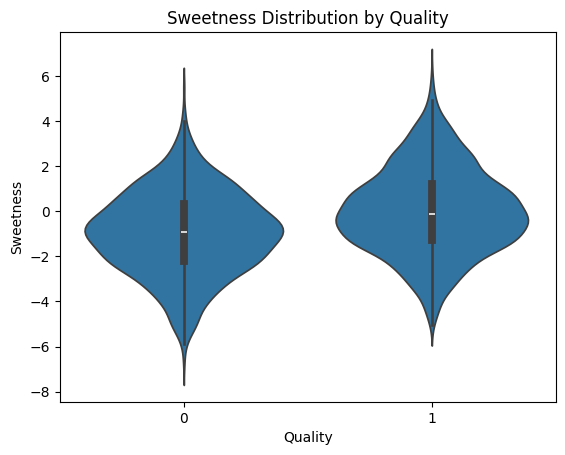

In [45]:
sns.violinplot(x='Quality', y='Sweetness', data=df)

# Customize the plot
plt.title('Sweetness Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Sweetness')
plt.show()


Quality
0   -0.974358
1   -0.033553
Name: Size, dtype: float64


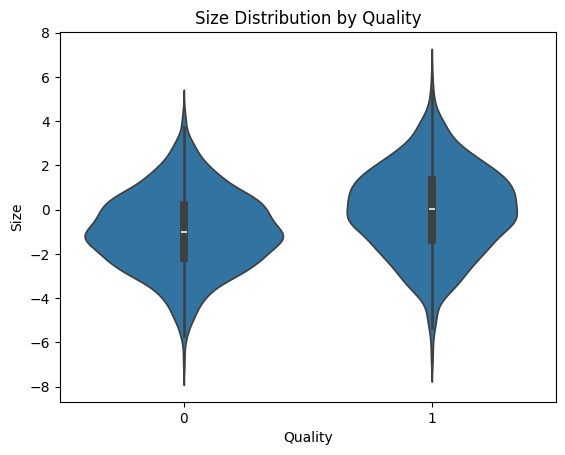

In [46]:
size_by_quality = df.groupby('Quality')['Size'].mean()
print(size_by_quality)

sns.violinplot(x='Quality', y='Size', data=df)

# Customize the plot
plt.title('Size Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Size')
plt.show()


Quality
0    0.008871
1    1.013356
Name: Juiciness, dtype: float64


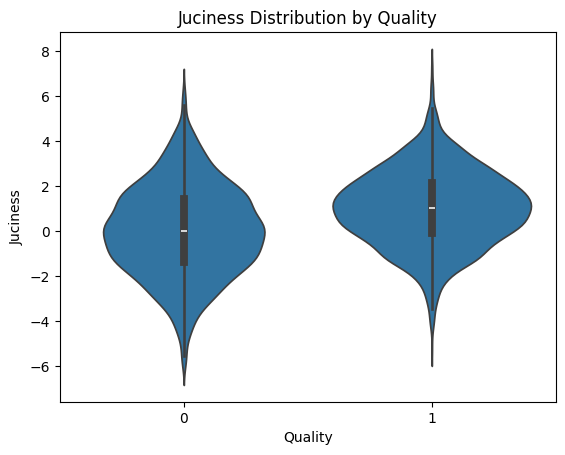

In [47]:
Juiciness_by_quality = df.groupby('Quality')['Juiciness'].mean()
print(Juiciness_by_quality)

sns.violinplot(x='Quality', y='Juiciness', data=df)

# Customize the plot
plt.title('Juciness Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Juciness')
plt.show()


Quality
0    0.994646
1    0.003890
Name: Ripeness, dtype: float64


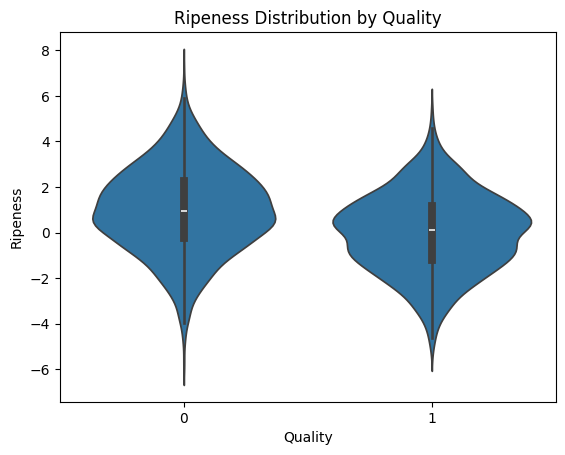

In [48]:
Ripeness_by_quality = df.groupby('Quality')['Ripeness'].mean()
print(Ripeness_by_quality)

sns.violinplot(x='Quality', y='Ripeness', data=df)

# Customize the plot
plt.title('Ripeness Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Ripeness')
plt.show()


In [49]:
X_df=df.drop('Quality',axis=1)
Y_df=df['Quality']

<h1>Logistic Regression to Predict the Quality</h1>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Use more iterations if necessary

# Train the model on the training data
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Confusion Matrix:
[[303  98]
 [ 99 300]]
Accuracy: 75.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



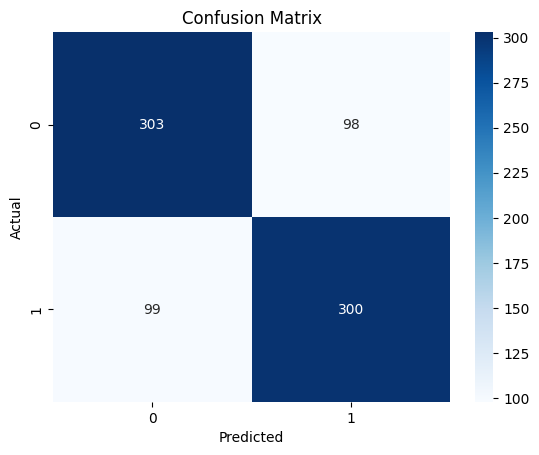

In [51]:
# Predict the outcomes on the test data
y_pred = lr_model.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
